In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import json
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/UNSW-Data-Science-Society/ml-workshop-2023T2/main/water_potability.csv")

## Meaning of the features

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

Maybe features that we can consider:

- Hardness-to-pH Ratio: Calculate the ratio of hardness to pH. This can capture the relationship between the hardness and acidity/alkalinity of water, which might be useful in predicting potability.

- TDS-to-Sulfate Ratio: Compute the ratio of total dissolved solids (TDS) to sulfate concentration. This ratio can provide information about the mineralization level relative to the sulfate content in the water.

- Chloramine-to-THM Ratio: Calculate the ratio of chloramines to trihalomethanes (THMs). This ratio can indicate the balance between disinfection byproducts and the primary disinfectant used in the water treatment process.

- Conductivity-to-Turbidity Ratio: Compute the ratio of conductivity to turbidity. This ratio can capture the relationship between the electrical conductivity of water (indicating ion concentration) and its clarity.

- Organic Carbon-to-TDS Ratio: Calculate the ratio of organic carbon to total dissolved solids. This ratio can provide insights into the organic matter content relative to the overall mineralization of the water.

- pH minus TDS: Compute the difference between pH and total dissolved solids. This can capture the variation between the acidity/alkalinity level and mineral content of the water.

- Chloramines minus THMs: Calculate the difference between chloramines and trihalomethanes. This difference can indicate the relative concentrations of disinfectants and disinfection byproducts in the water.

In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## Plotting and EDA analysis

- Frequency of response (0 and 1) what we are predicting
- This data is balanced or imbalanced?

1250 that is 1, 2000 that is 0.
This is not a perfect balance but the ratio of 0s to 1s (2000: 1250) is approximately 1. So we don't need to create data points, therefore, this dataset is balanced.


Slight Imbalance. An imbalanced classification problem where the distribution of examples is uneven by a small amount in the training dataset (e.g. 4:6).
Severe Imbalance. An imbalanced classification problem where the distribution of examples is uneven by a large amount in the training dataset (e.g. 1:100 or more).

A slight imbalance is often not a concern, and the problem can often be treated like a normal classification predictive modeling problem.




In [ ]:
# Check for which columns have NULLS and impute them with the MEAN in this case (0 imputation not suitable)

df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
#Replace null values based on the group/sample mean
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [ ]:
X = df.drop("Potability", axis = 1)
y = df["Potability"]

(array([1998.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1278.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

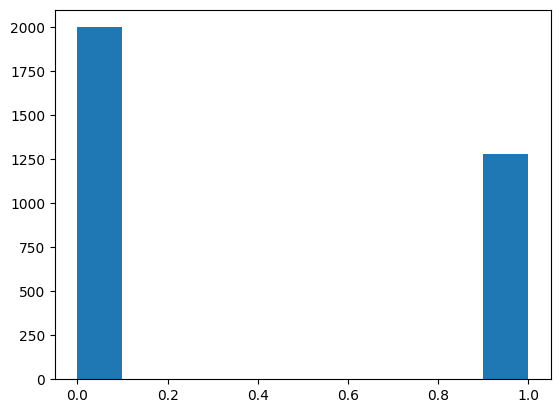

In [ ]:
# Histograms

plt.hist(df["Potability"])

In [ ]:
df['Potability']=df['Potability'].astype('category')

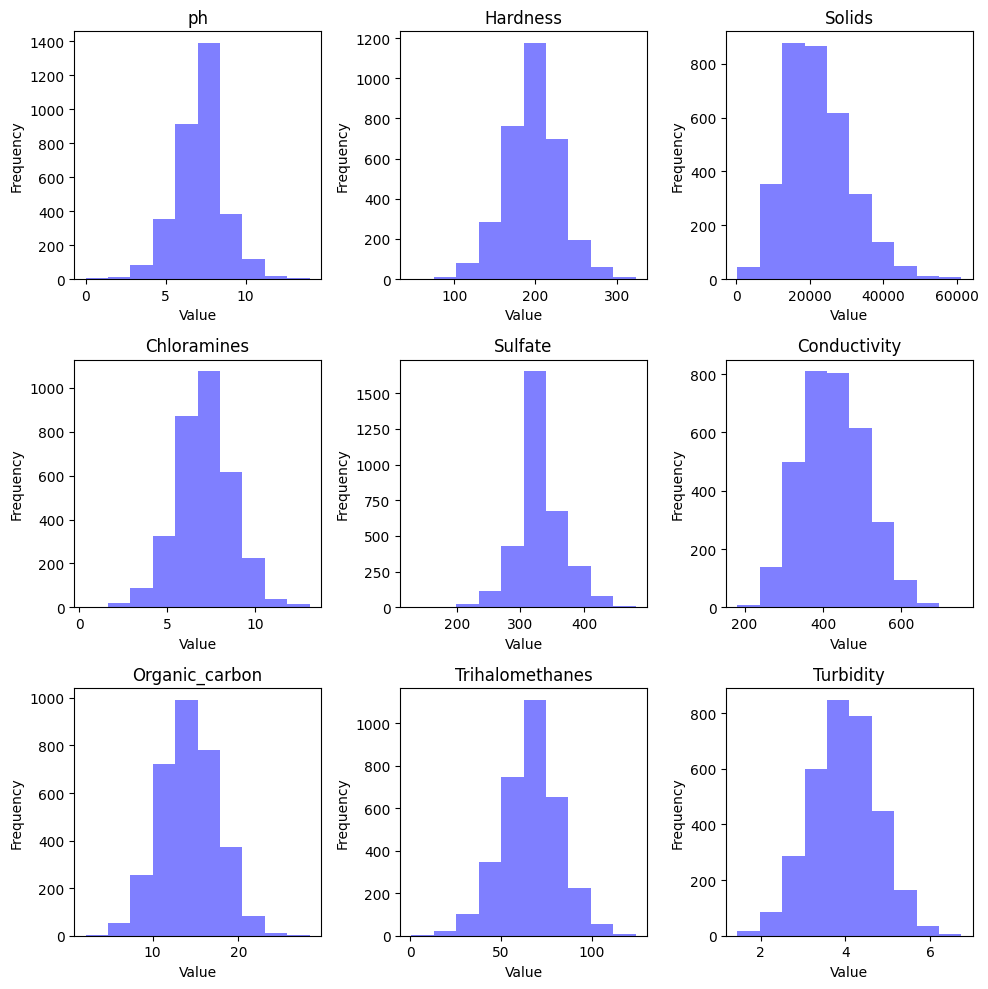

In [ ]:
import matplotlib.pyplot as plt

n_rows = 3
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))

axes = axes.flatten()

for i, feature in enumerate(X.columns):
    ax = axes[i]

    ax.hist(df[feature], bins=10, alpha=0.5, color='blue')

    ax.set_title(feature)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')


# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

<ipython-input-40-3fa05060ac04>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


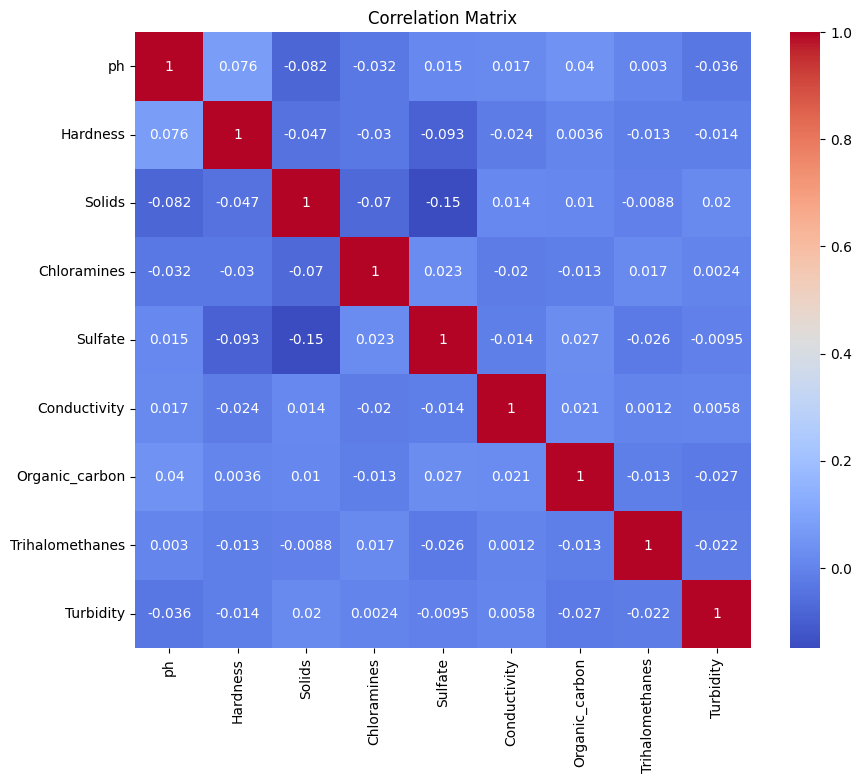

In [ ]:
corr_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Add title and display the plot
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080855,196.369496,22014.092526,7.122277,333.785123,426.205111,14.284970,66.395671,3.966786
std,1.469958,32.879761,8768.570828,1.583085,36.145701,80.824064,3.308162,15.769901,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711
50%,7.085378,196.967627,20927.833607,7.130299,334.564290,421.884968,14.218338,66.303555,3.955028
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


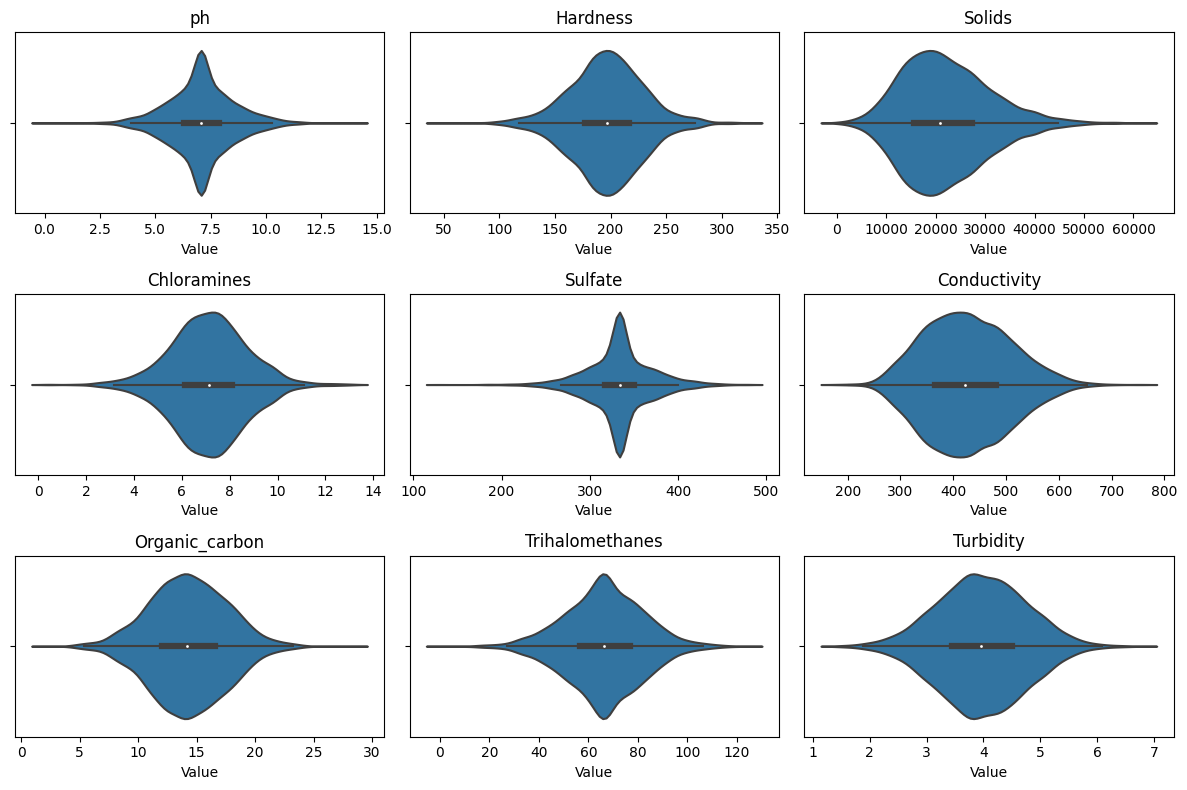

In [ ]:
n_rows = 3
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

axes = axes.flatten()

variables = list(X.columns) # Replace with your desired variables
for i, variable in enumerate(variables):
    # Select the current axis
    ax = axes[i]

    # Create the violin plot for the current variable
    sns.violinplot(x=variable, data=df, ax=ax)

    # Set the title and labels
    ax.set_title(variable)
    ax.set_xlabel('Value')
    ax.set_ylabel('')


# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

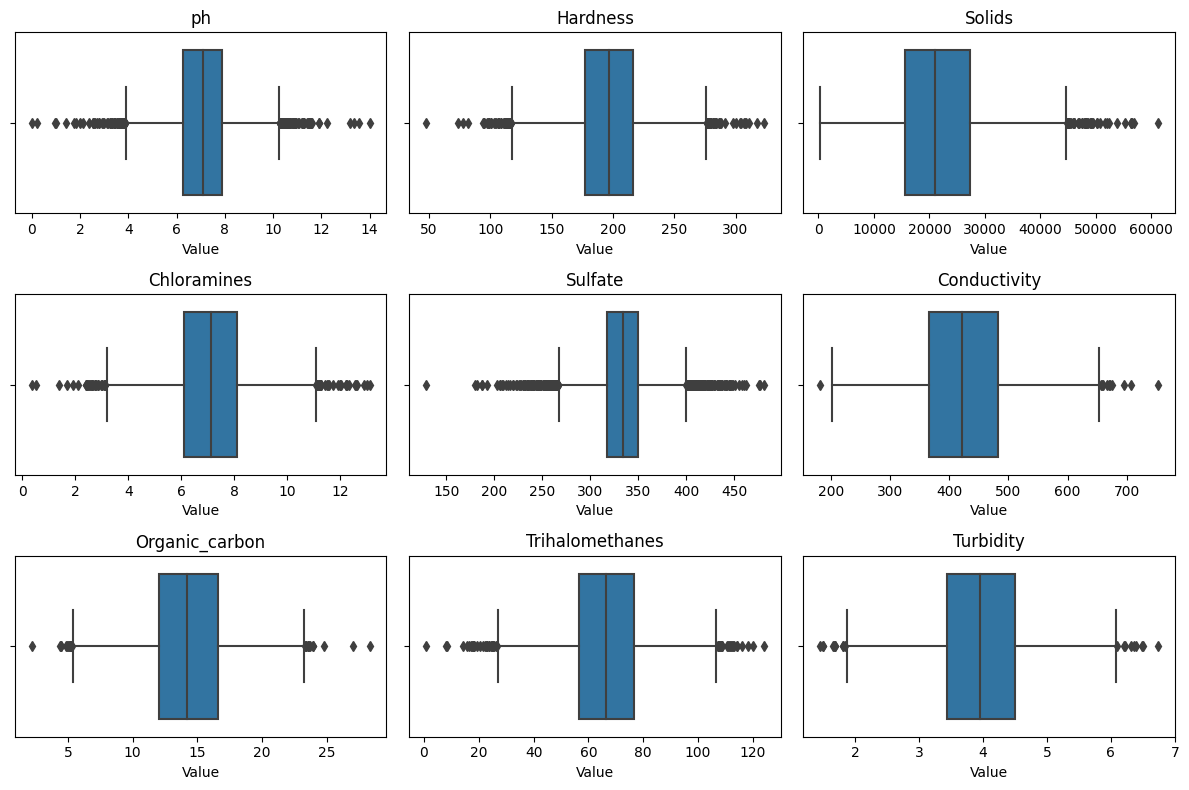

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

n_rows = 3
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

axes = axes.flatten()

variables = list(X.columns) # Replace with your desired variables
for i, variable in enumerate(variables):
    # Select the current axis
    ax = axes[i]

    # Create the box and whisker plot for the current variable
    sns.boxplot(x=variable, data=df, ax=ax)

    # Set the title and labels
    ax.set_title(variable)
    ax.set_xlabel('Value')
    ax.set_ylabel('')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


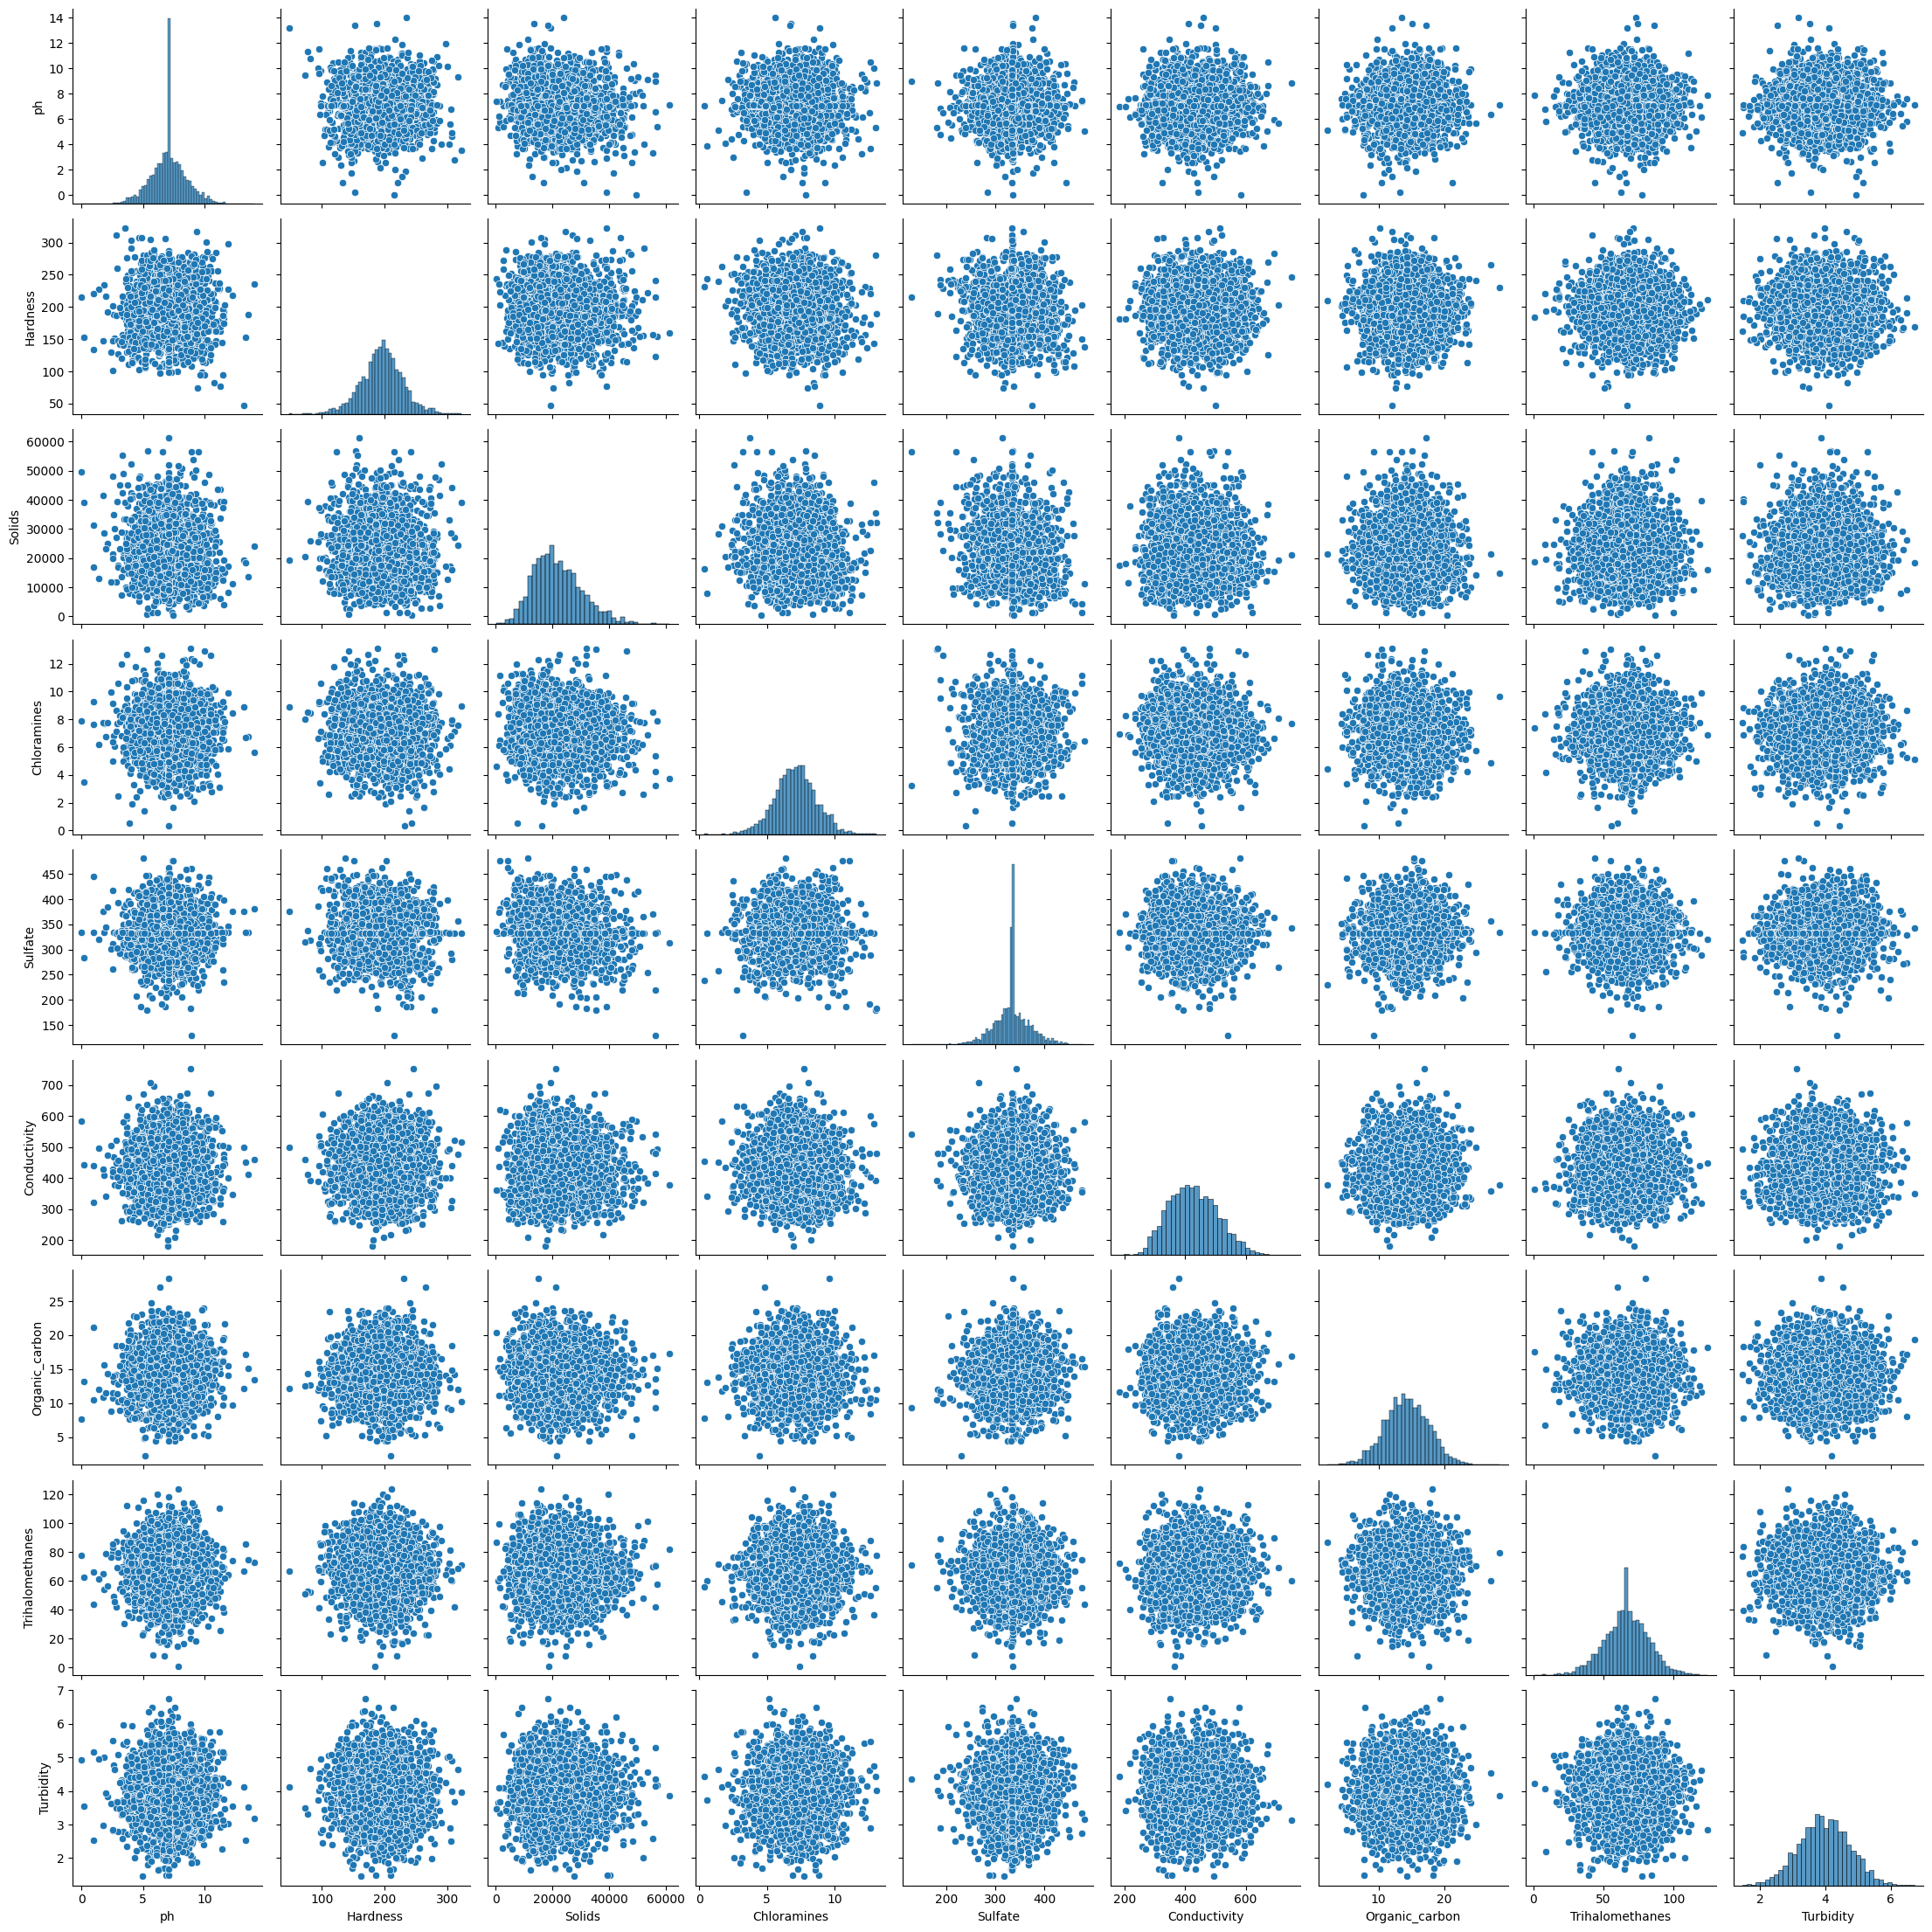

In [ ]:
sns.pairplot(df)


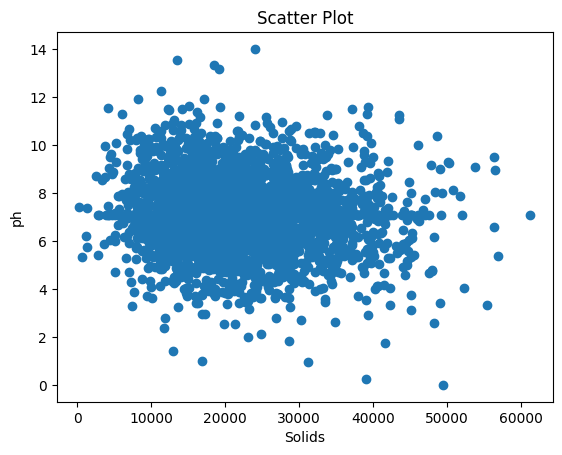

In [ ]:
# Double check the pairplot

plt.scatter(df['Solids'], df['ph'])

# Set the labels and title
plt.xlabel('Solids')
plt.ylabel('ph')
plt.title('Scatter Plot')

# Display the plot
plt.show()

In [ ]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

<Axes: xlabel='ph'>

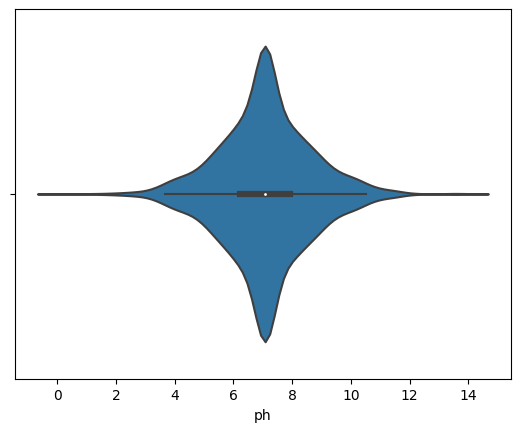

In [ ]:
filtered_df = df[df['Potability'] == 0]

sns.violinplot(x='ph', data=filtered_df) # you just needed to get rid of the ax = ax (because the ax specified the previous plot :)

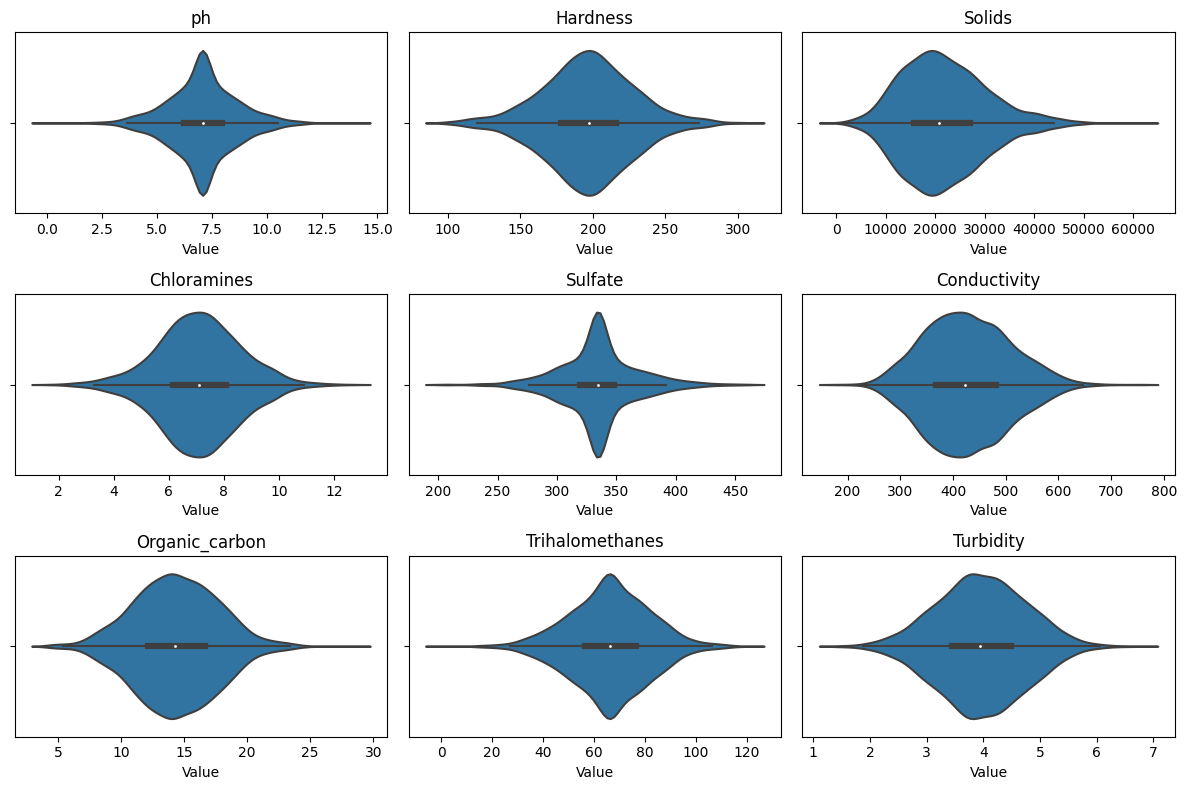

In [ ]:
n_rows = 3
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

axes = axes.flatten()

variables = list(X.columns) # Replace with your desired variables
for i, variable in enumerate(variables):
    # Select the current axis
    ax = axes[i]

    # Create the violin plot for the current variable
    sns.violinplot(x=variable, data=filtered_df, ax=ax)

    # Set the title and labels
    ax.set_title(variable)
    ax.set_xlabel('Value')
    ax.set_ylabel('')


# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
notpotable  = df[df['Potability']==0]
potable = df[df['Potability']==1]

In [ ]:
print(len(notpotable))
print(len(potable))

1998
1278


In [ ]:
from sklearn.utils import resample
df_minority_upsampled = resample(potable, replace = True, n_samples = 1998, random_state = 42)

from sklearn.utils import shuffle
df = pd.concat([notpotable, df_minority_upsampled])
df = shuffle(df)

In [ ]:
X = df.drop('Potability', axis = 1)
y = df['Potability']

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create an instance of the StandardScaler for normalization
scaler = StandardScaler()

# Normalize the features in X
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Create an instance of Logistic Regression
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6286876907426246


In [ ]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.005844,-0.246998,0.750536,0.587582,1.335294,-0.054682,-1.117452,-0.202291,-0.938934
1,0.074885,-0.856455,0.080096,-0.527665,-1.709587,0.130717,0.656002,-0.122272,3.126131
2,-0.013773,1.410171,0.807459,-0.800215,0.183321,0.446057,-2.682430,0.005814,-0.560556
3,-0.709172,0.463637,-1.986388,1.518663,0.023377,-1.344653,1.068061,-0.812827,-0.772151
4,1.700787,0.814997,0.694470,-0.919799,0.023377,-0.345662,-0.881878,-1.377570,-0.037641
...,...,...,...,...,...,...,...,...,...
2288,-1.987416,0.360283,-0.034182,-0.805120,-0.172673,-1.986664,-0.917020,-1.244778,0.816045
2289,0.478652,-0.962696,0.381358,0.478209,0.678570,-0.345895,0.317674,0.005814,0.336420
2290,-0.316983,-0.298326,0.991890,0.373764,0.023377,-1.173728,-0.132680,1.278849,-0.601709
2291,1.155101,0.654608,-0.666520,0.175097,0.009264,-0.461509,0.638941,-1.218429,0.406009


In [ ]:
y_train

2985    0
1073    1
3140    1
2643    0
2174    0
       ..
1095    1
1130    1
1294    0
860     0
3174    1
Name: Potability, Length: 2293, dtype: int64

Feature: 0, Score: -0.01687
Feature: 1, Score: -0.05129
Feature: 2, Score: 0.03467
Feature: 3, Score: 0.03208
Feature: 4, Score: -0.07025
Feature: 5, Score: -0.00238
Feature: 6, Score: -0.04945
Feature: 7, Score: 0.00993
Feature: 8, Score: -0.01005


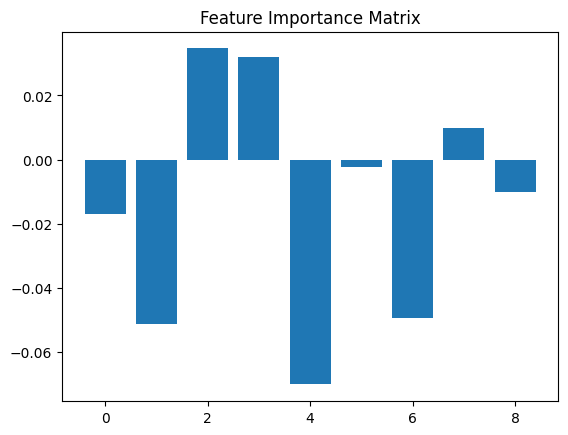

In [ ]:
## Feature importance for logistic regression
importance = lr.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance Matrix')
plt.show()

 Looking at the Feature importance matrix we can deduce that - 3 features have a positive importance of which **Chloromines** has the highest importance and **Hardness** has the least importance of all the features.

In [ ]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


 **Looking at the Feature importance matrix we can deduce that - 3 features have a positive importance of which 'Chloromines' poses the highest importance and 'Hardness' has the least importance of all the features.**

## Random Forest Classifier - Faris

---



In [ ]:
# Import the necessary libraries like pandas, numpy and RFC.
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Import the data set
df = pd.read_csv("https://raw.githubusercontent.com/UNSW-Data-Science-Society/ml-workshop-2023T2/main/water_potability.csv")

# Replace null values based on the group/sample mean
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

# Defining variables x and y
X = df.drop("Potability", axis = 1)
y = df["Potability"]

# Using the function train_test_split, we split our data set into two categories (training and testing set).
# X and y has been previously defined, and test size decides the split size. In this case, we make 33% of the data being the testing set, and the other 67% being the training set.
# Random state allows for reproducible results
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Assign the random forest model under name rf_model to be called upon later
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Import accuracy_score function and we test our model prediction using the testing set we have split from earlier.
# We compare the accuracy of our model prediction against the real values from the testing set, and print the result.
from sklearn.metrics import accuracy_score
y_pred = rf_model.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.789279112754159


In [ ]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

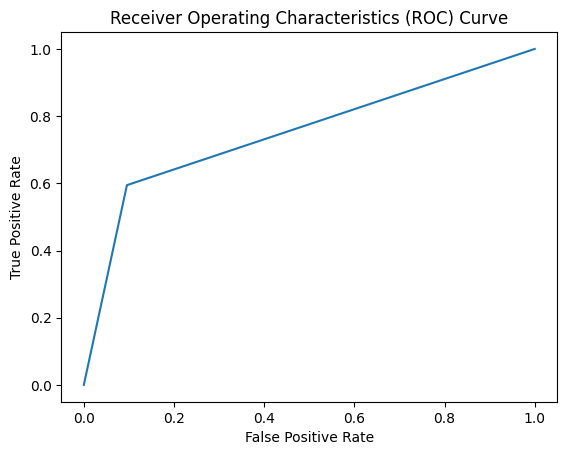

In [ ]:
# Plotting Receiver Operating Characteristic (ROC) curve

# Pass in the test values and our RF model predictions value into the roc_curve  function.
# On the roc_curve fx returns: fpr = false positive rate, tpr = true positive rate and (3rd element : the classification treshold, e.g. 50%, but we are not using it here).
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, treshold = roc_curve(y_test, y_pred)

# Import matplotlib library.
# Plot the fpr tpr againts the fpr, and label the axes and title.
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')

# Show the plot.
plt.show()

In [ ]:
# ROC score
# Calculates the AUC (area under curve) closer to 1, the better - MX comment: indicates higher True Positive Rates throughout model - better model quality
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.749469563944981

## Hyperparameter Optimisation for Logistic Regression

---



In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

n_iterations = 1

param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],                  #penalty - minimize the loss function
    'C' : [10000, 1000, 100, 10, 1.0, 0.1, 0.01, 0.001 , 0.0001],    #c - higher the value, higher the weights of coefficients for training data
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']        #solver - decides the best optimization algorithm, inshort minimizing the standard error
    }

for value in param_grid.values():
    n_iterations *= len(value)

print('The total number of iterations are: ', n_iterations)

log_model = LogisticRegression()

grid_cv = GridSearchCV(log_model,
                       param_grid,
                       cv=2,
                       verbose = True,
                       n_jobs = -1)

random_cv = RandomizedSearchCV(log_model,
                               param_grid,
                               n_iter=10,
                               cv=2,
                               n_jobs=-1,
                               verbose = True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
fit_randomizedsearch = random_cv.fit(X_train, y_train)
fit_gridsearch = grid_cv.fit(X_train, y_train)

print('\n')
print("Best params of RandomizedSearchCV:")
print(random_cv.best_params_)
print('\n')
print("Best params of GridSearchCV: ")
print(grid_cv.best_params_)
print('\n')
random_model = random_cv.best_estimator_
y_pred_random = random_model.predict(X_test)
print('The accuracy score with RandomizedSearchCV is', accuracy_score(y_test, y_pred_random))

grid_model = grid_cv.best_estimator_
y_pred_grid = grid_model.predict(X_test)
print('The accuracy score with GridSearchCV is', accuracy_score(y_test, y_pred_grid))

The total number of iterations are:  180
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 180 candidates, totalling 360 fits


Best params of RandomizedSearchCV:
{'solver': 'newton-cg', 'penalty': 'none', 'C': 0.1}


Best params of GridSearchCV: 
{'C': 0.0001, 'penalty': 'l2', 'solver': 'newton-cg'}


The accuracy score with RandomizedSearchCV is 0.6286876907426246
The accuracy score with GridSearchCV is 0.6276703967446592


## Hyperparameter Optimisation for Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


n_iterations = 1

param_grid = {
    "n_estimators": [200,600,1000],                             #n_estimators - numbers of trees in the forest
    "max_features": ["sqrt", "log2"],                           #max_features - type of method used to split a node
    "max_depth": [10,30,50],                                    #max_depth - depth of a decision tree
    "min_samples_split": [2,3,4],                               #min_samples_split - minimum no. of samples required to split a node
    "min_samples_leaf": [1, 2, 4],                              #min_samples_leaf - minimum no. of samples in the leaf node
    "bootstrap": [True, False],                                 #bootstrap - used for sampling subsets of training data with or without replacement
}

for value in param_grid.values():
    n_iterations *= len(value)

print('The total number of iterations are: ', n_iterations)


forest = RandomForestClassifier()

random_cv = RandomizedSearchCV(forest,
                               param_grid,
                               n_iter=10,
                               cv=2,
                               scoring="precision",
                               n_jobs=-1,
                               verbose = True)

grid_cv = GridSearchCV(forest,
                       param_grid,
                       cv = 2,
                       scoring = 'accuracy',
                       verbose=True,
                       n_jobs=-1)

fit_randomizedsearch = random_cv.fit(X_train, y_train)
fit_gridsearch = grid_cv.fit(X_train, y_train)

print('\n')
print("Best params of RandomizedSearchCV: ")
print(random_cv.best_params_)
print('\n')

print("Best params of GridSearchCV: ")
print(grid_cv.best_params_)
print('\n')

random_model = random_cv.best_estimator_
y_pred_random = random_model.predict(X_test)
print('The accuracy score with RandomizedSearchCV is', accuracy_score(y_test, y_pred_random))

grid_model = grid_cv.best_estimator_
y_pred_grid = grid_model.predict(X_test)
print('The accuracy score with GridSearchCV is', accuracy_score(y_test, y_pred_grid))

The total number of iterations are:  324
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 324 candidates, totalling 648 fits


Best params of RandomizedSearchCV: 
{'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}


Best params of GridSearchCV: 
{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 600}


The accuracy score with RandomizedSearchCV is 0.7924720244150559
The accuracy score with GridSearchCV is 0.797558494404883
